In [1]:
library(pracma)
library(ggplot2)
set.seed(123)

In [2]:
df = data.frame() # prepare our random dataset
for (i in (1:10000)){
    random = runif(2,-1,1)
    df[i,'x1'] = random[1]
    df[i,'x2'] = random[2]
    df[i,'y1'] = sin(pi*df[i,'x1'])
    df[i,'y2'] = sin(pi*df[i,'x2'])   
}

# Constant Hypothesis

In [3]:
# generate 10,000 hypotheses
for (i in (1:10000)){
    df[i,'g(x)'] = (df[i, 'y1'] + df[i, 'y2']) / 2
}

In [4]:
# get g(x) bar
gbar = mean(df[['g(x)']])
gbar

[1] -0.00496095

Calculate variance

In [5]:
varianceM = apply(df['g(x)'], 2, function(x) {(x-gbar)^2}) # use each hypothesis minus gbar and take square of it

In [6]:
var = colMeans(varianceM) # get the mean which is the variance

In [7]:
df['gbar'] = rep(gbar, nrow(df)) # create a column 'gbar' for calculating bias

For constant hypothesis, variance and bias are below

one way to calculate the bias. calculate bias1 based on X1 and bias2 on X2, then take the mean of them.

In [8]:
df['bias'] = (df['y1'] - df['gbar'])^2 # calculate the bias (gbar - f(x)) {f(x) is the target function}
mean(df[['bias']])

[1] 0.4974003

In [9]:
df['bias2'] = (df['y2'] - df['gbar'])^2
mean(df[['bias2']])

[1] 0.501962

In [10]:
(mean(df[['bias']]) + mean(df[['bias2']]))/2

[1] 0.4996812

another way is calculate based all X1 and X2

In [11]:
df1 = data.frame(matrix(0, nrow=20000) )
colnames(df1) = 'gbar'
df1['gbar'] =  rep(gbar, 20000)
df1[1:10000,'y'] = df[["y1"]] 
df1[10001:20000,'y']= df[["y2"]] 
df1['bias'] = (df1['y'] - df1['gbar'])^2

In [12]:
bias = mean(df1[['bias']])
bias

[1] 0.4996812

## Result

In [13]:
round(var,3)

g(x) 
0.247

In [14]:
round(bias,3)

[1] 0.5

In [15]:
graph = data.frame(matrix(0, nrow=10000))
colnames(graph) = 'x'
graph['x'] = df['x1']
graph['gbar'] = rep(gbar, nrow(graph))
graph['gbar+var'] = graph['gbar'] + sqrt(var)
graph['y'] = df['y1']

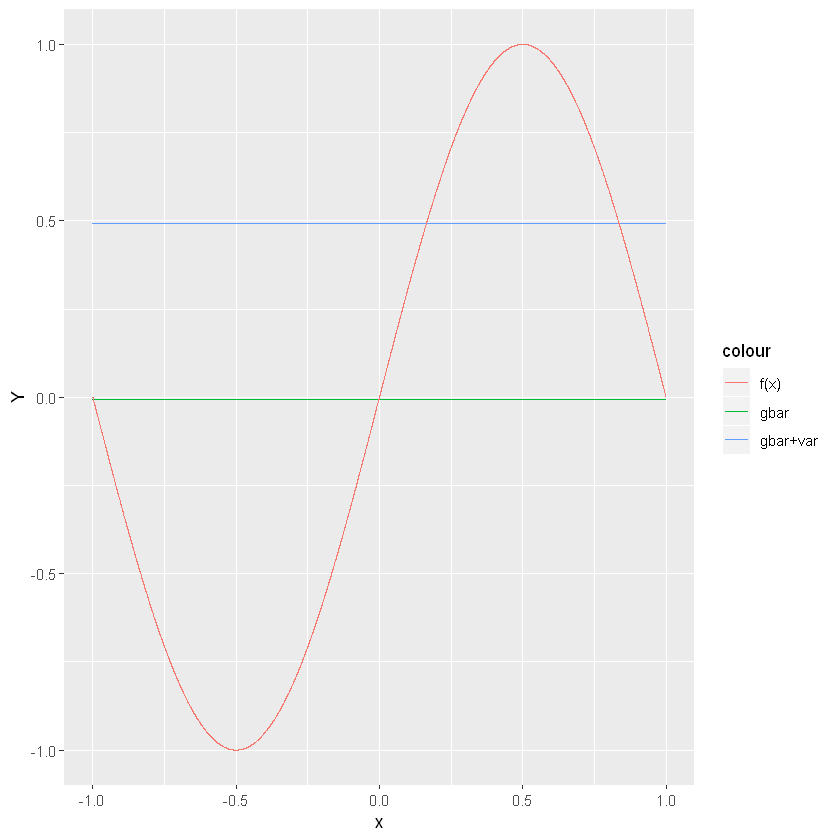

In [57]:
ggplot(graph) + 
geom_line(aes(x=x,y=gbar,colour = 'gbar') ) + 
geom_line(aes(x=x,y=gbar+sqrt(var),colour = 'gbar+var'), ) + 
geom_line(aes(x=x,y=y,colour = 'f(x)')) + 
ylab("Y")

# Linear Hypothesis

In [17]:
df2 = df[c('x1','x2','y1','y2')] # get data

In [18]:
df2['m'] = (df['y2'] - df['y1']) / (df['x2'] - df['x1']) # calculate slope
df2['b'] = df2['y1'] - df2['m']*df2['x1'] # calculate the intercept

In [19]:
b = mean(df2[['b']]) 
m = mean(df2[['m']]) # get the average linear function parameter

In [20]:
m
b

[1] 0.7977892

[1] -0.01556352

In [21]:
df2['g(x)'] = m*df2['x1'] + b # this is to calculate the g(x)bar for each x1
df2['g(x)2'] = m*df2['x2'] + b # this is to calculate the g(x)bar for each x2

In [44]:
testdf = data.frame(matrix(0, nrow=10000))
colnames(testdf) = 'x'
testdf[1:10000,'x'] = df2['x1']
testdf[1:10000, 'g(x)'] = df2['g(x)']

In [51]:
testdf[1,1]

[1] -0.424845

In [45]:
# mMatrix is 10000 by 1
# bMatrix is 10000 by 1
# calculate gdx based on x and two matrices 
# calculate the variance for one point and return it 
# the return would be 10000 by 1
# so after mapply, the result matrix would be 10000 by 10000
# in result matrix, each row represents variant for each x point
# then I took colmeans and take mean from that
test = function(x, gbar){
    mMatrix = matrix(df2$m)
    bMatrix = matrix(df2$b)
    gdx = x*mMatrix + bMatrix
    return ((gdx - gbar)^2)
} 
result = mapply(test,testdf$x,testdf[['g(x)']])
varl = mean(colMeans(result))

In [47]:
varl

[1] 1.647081

In [48]:
df2['bias'] = (df2['g(x)'] - df2['y1'])^2
mean(df2[['bias']]) # calculate bias based on all x1

[1] 0.2030228

In [26]:
df2['bias2'] = (df2['g(x)2'] - df2['y2'])^2
mean(df2[['bias2']]) # calculate the bias based on all x2

[1] 0.2020058

In [27]:
biasl = (mean(df2[['bias2']]) + mean(df2[['bias']]))/2 # calculate the average

## Result

In [28]:
round(biasl,3)

[1] 0.203

In [29]:
round(varl,3)

[1] 1.643

In [30]:
g2 = data.frame(matrix(0, nrow=10000))
colnames(g2) = 'x'
g2['x'] = df['x1']
g2['y'] = df['y1']
g2['xlinear'] = seq(-1,1, length.out = 10000)
g2['ylinear'] = m*g2['xlinear'] + b
g2['ylinear+var'] = g2['ylinear']+ sqrt(varl)

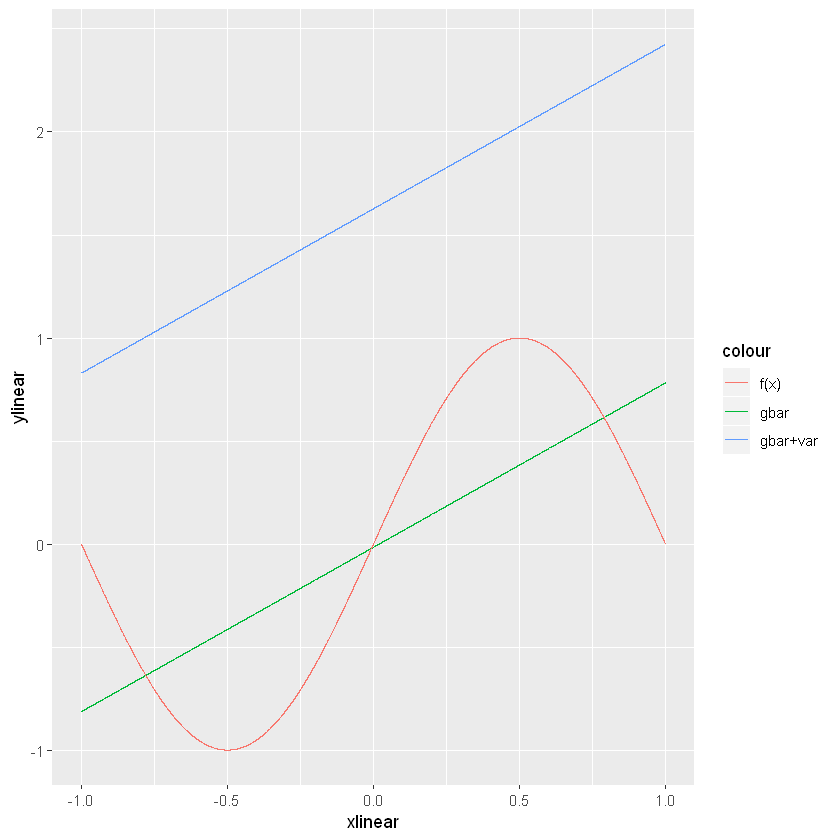

In [31]:
ggplot(g2) + 
geom_line(aes(x=xlinear,y=ylinear,colour = 'gbar') ) + 
geom_line(aes(x=x,y=y,colour = 'f(x)')) + 
geom_line(aes(x=xlinear,y=ylinear+varl,colour = 'gbar+var') )